<a href="https://colab.research.google.com/github/Harishacoursera/Play-Store-Analysis-EDA-AlmaBetter/blob/main/Play_Store_App_Review_Analysis_Capstone_Project_Harisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b> Play Store App Review Analysis(EDA)
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.

Explore and analyze the data to discover key factors responsible for app engagement and success.




#<b> Import libraries/packages


In [2]:
pip install pandas


In [3]:
!pip install matplotlib-venn

In [3]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [4]:
!pip install cartopy
import cartopy

     |████████████████████████████████| 12.1 MB 154 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 219 kB 55.4 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516236 sha256=94b505803a7629fffec9497be9f50ebaee4701c4316ff2e3dba42d7d8c883f66
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=c2c1e4523c4ce15979d56110cc67d59326d8951a007ab08ccca47ea6cdc242df
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built cartopy pyshp


In [ ]:
!pip install jovian opendatasets --upgrade --quiet

     |████████████████████████████████| 68 kB 4.5 MB/s 


In [4]:
#import library
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.75)
plt.rcParams['figure.figsize'] = [20.0, 5.0] # preetify plots\n
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


#<b> Loading Datasets

In [5]:
#read to Plays store csv files
apps_df = pd.read_csv('/content/drive/MyDrive/PROJECT/Play Store Data.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/PROJECT/User Reviews.csv')



In [7]:
#Understandind data sets
apps_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
apps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [9]:
apps_df.describe()#Descriptive statistics


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
apps_df.shape

(10841, 13)

In [12]:
apps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [14]:
apps_df.nunique()#to understand unique values

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [17]:
apps_df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

#<B> Cleaning Data
#####<B>1)Removing extraneous data.
#####<B>2)Filling in missing values.
#####<B>3)Conforming data to a standardized pattern.

##1)Removing extraneous data.

In [29]:
apps_df.info()#Check for missing values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [30]:
apps_df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
apps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

# To check how many ratings are more than 5-Outliers

In [45]:
# Row 10472 removed due to missing value of Category
apps_df.drop(apps_df.index[10472], inplace=True)

In [46]:
apps_df[apps_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [48]:
apps_df[10470:10475]#To check whether row has been removed or not.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4.0,4.0 and up


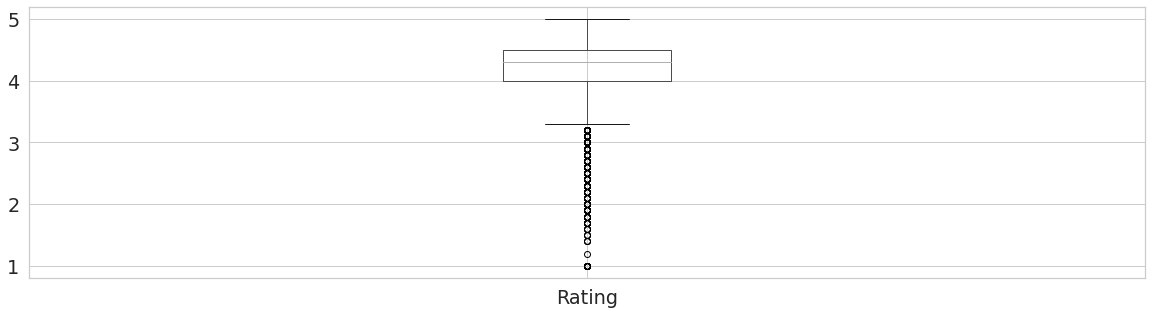

In [49]:
apps_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb293296750>]],
      dtype=object)

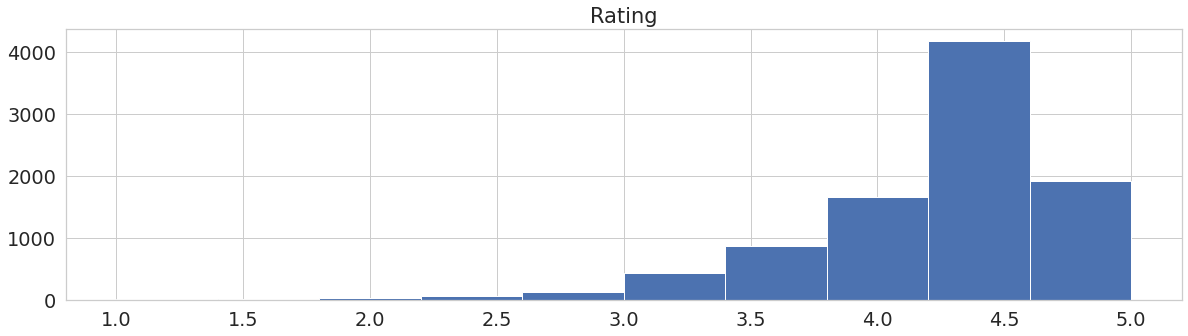

In [51]:
apps_df.hist()

#Removing columns which are 90% empty


In [53]:
threshold = len(apps_df)*0.1 #10% of rows value

In [54]:
apps_df.dropna(thresh=threshold, axis=1, inplace = True)

In [55]:
print(apps_df.isnull().sum())#None of the columns dropped which has 10% data only

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


##2)Filling in missing values - Data Imputation and Manipulation
Fill the null values with appropriate values using aggreagate functions such as mean,median or mode.

In [56]:
def inpute_median(series):
  return series.fillna(series.median())#Define a function inpute_median

In [60]:
apps_df.Rating = apps_df['Rating'].transform(inpute_median)

In [61]:
apps_df.isnull().sum()#count the number of null values to each column

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [63]:
#modes of categorical values
print(apps_df['Type'].mode())
print(apps_df['Current Ver'].mode())
print(apps_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [77]:
# Fill the missing categorical values with mode
apps_df['Type'].fillna(str(apps_df['Type'].mode().values[0]),inplace=True)
apps_df['Current Ver'].fillna(str(apps_df['Current Ver'].mode().values[0]),inplace=True)
apps_df['Android Ver'].fillna(str(apps_df['Android Ver'].mode().values[0]),inplace=True)


In [78]:
apps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

###Converting Price, Reviews and Ratings into Numerical Values.

In [81]:
apps_df['Price'] = apps_df['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
apps_df['Price'] = apps_df['Price'].apply(lambda x: float(x))
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'], errors='coerce')

In [82]:
apps_df['Installs'] = apps_df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
apps_df['Installs'] = apps_df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
apps_df['Installs'] = apps_df['Installs'].apply(lambda x: float(x))

In [83]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [84]:
apps_df.describe()#Summary stats after cleaning

,Rating,Reviews,Installs,Price
count,10838.000000,1.083800e+04,1.083800e+04,10838.000000
mean,4.206560,4.442348e+05,1.546719e+07,1.027558
std,0.480323,2.928025e+06,8.503695e+07,15.951169
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,2.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.479050e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


##<b> Data Visualization



In [85]:
grp = apps_df.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)#grouping all apps storing in grp

Category
ART_AND_DESIGN         4.359375
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.182124
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

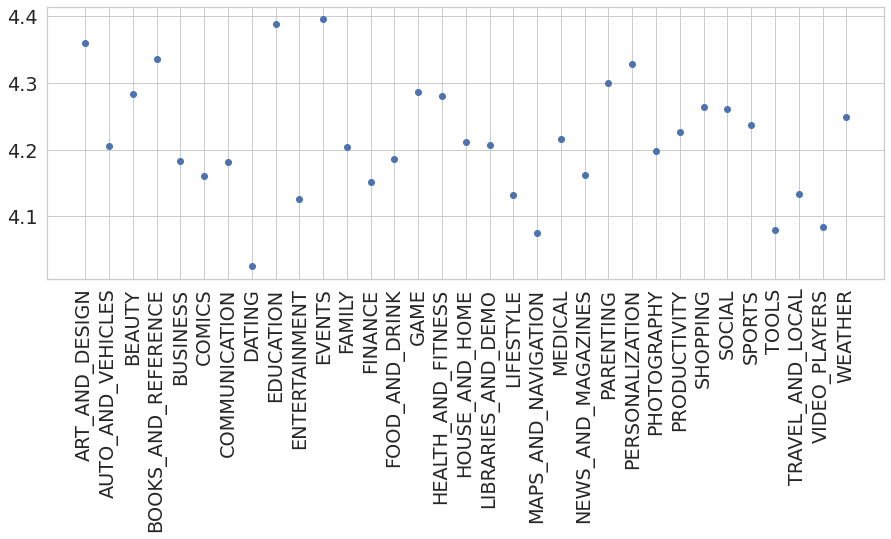

In [108]:
plt.figure(figsize=(15,5))
plt.plot(x, 'ro',color = 'b')
plt.xticks(rotation=90)
plt.show()

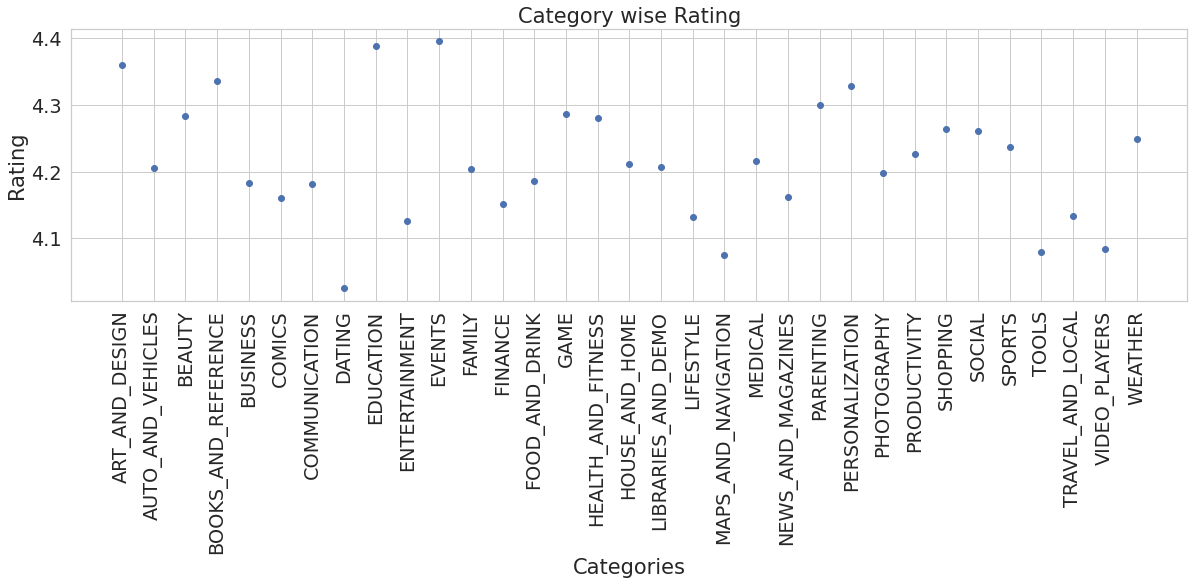

In [109]:
plt.figure(figsize=(20,5))
plt.plot(x,'ro', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Categories')
plt.ylabel('Rating')
plt.show()

In [115]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='b'
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories')
plt.ylabel('Prices')
plt.show()

SyntaxError: ignored

#<b>ASSUMPTIONS

###<b> Assumption 1: Apps with Ratings 1 to 2.5 would have more negative sentiment reviews.

In [ ]:
apps_rated_0_to_2_5_filter = (apps_df.Rating >= 0) & (apps_df.Rating < 2.5)
selected_columns = ['App', 'Rating', 'Reviews']
apps_rated_0_to_2_5_df = apps_df[apps_rated_0_to_2_5_filter][selected_columns]
apps_rated_0_to_2_5_df


,App,Rating,Reviews
518,Just She - Top Lesbian Dating,1.9,953
554,Just She - Top Lesbian Dating,1.9,953
625,House party - live chat,1.0,1
663,Just She - Top Lesbian Dating,1.9,954
2403,5 Minute Veterinary Consult: Canine & Feline,2.3,17
...,...,...,...
10424,First Hawaiian Bank Mobile,2.1,232
10458,Candy simply-Fi,2.1,2390
10562,FK Atlantas,1.5,2
10578,Check Lottery Tickets - Florida,2.0,27


In [ ]:
selected_columns = ['App', 'Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity']
reviews_df[selected_columns]



,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
reviews_rated_0_to_2_5_df = apps_rated_0_to_2_5_df.merge(reviews_df[selected_columns], on='App')
reviews_rated_0_to_2_5_df


,App,Rating,Reviews,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


Hence, could not find any reviews for apps rated in the user reviews dataset. Apps that have ratings between 0 to 2.5, no (zero) Apps have reviews in the user reviews dataset, just a rating. Although we were expecting most of them to have Negative review sentiment (and maybe some Neutral ones) but now it's hard to tell if no review has been left for the reason they were unhappy with the App or did they not get translated (or it's a data issue).

##<b> Assumption 2: 
Apps with Ratings 2.5 to 3.5 would have more neutral sentiment Reviews

In [ ]:
apps_rated_2_5_to_3_5_filter = (apps_df.Rating >= 2.5) & (apps_df.Rating < 3.5)
selected_columns = ['App', 'Rating', 'Reviews']
apps_rated_2_5_to_3_5_df = apps_df[apps_rated_2_5_to_3_5_filter][selected_columns]
apps_rated_2_5_to_3_5_df


,App,Rating,Reviews
15,Learn To Draw Kawaii Characters,3.2,55
87,RST - Sale of cars on the PCT,3.2,250
159,Cloud of Books,3.3,1862
176,Free Book Reader,3.4,1680
209,Plugin:AOT v5.0,3.1,4034
...,...,...,...
10757,Fisher-Price® Smart Connect™,2.7,422
10765,Chat For Strangers - Video Chat,3.4,622
10766,FreedomPop Diagnostics,2.9,452
10819,Fanfic-FR,3.3,52


In [ ]:
selected_columns = ['App', 'Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity']
reviews_df[selected_columns]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
reviews_rated_2_5_to_3_5_df = apps_rated_2_5_to_3_5_df.merge(reviews_df[selected_columns],on='App')
reviews_rated_2_5_to_3_5_df


,App,Rating,Reviews,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Free Book Reader,3.4,1680,NaN,NaN,NaN,NaN
1,Free Book Reader,3.4,1680,NaN,NaN,NaN,NaN
2,Free Book Reader,3.4,1680,NaN,NaN,NaN,NaN
3,Free Book Reader,3.4,1680,NaN,NaN,NaN,NaN
4,Free Book Reader,3.4,1680,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1675,Draw A Stickman,3.4,29265,NaN,NaN,NaN,NaN
1676,Draw A Stickman,3.4,29265,NaN,NaN,NaN,NaN
1677,Draw A Stickman,3.4,29265,NaN,NaN,NaN,NaN
1678,Draw A Stickman,3.4,29265,NaN,NaN,NaN,NaN
